# **SARIMAX Models**

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [131]:
#Mounting drive to access Google Drive
drive.mount('/content/drive')

#Converting to DataFrame and sorting values
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/RestaurantVisitors.csv', index_col='date',parse_dates=True)

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [0]:
data.index.freq='D'

**Case 1: Without Exogenous variables**

In [71]:
data.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [134]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ KB


In [74]:
data.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [0]:
cols= ['rest1', 'rest2', 'rest3','rest4', 'total']

In [0]:
for col in cols:
    data[col]=data[col].astype(int)

In [77]:
data.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


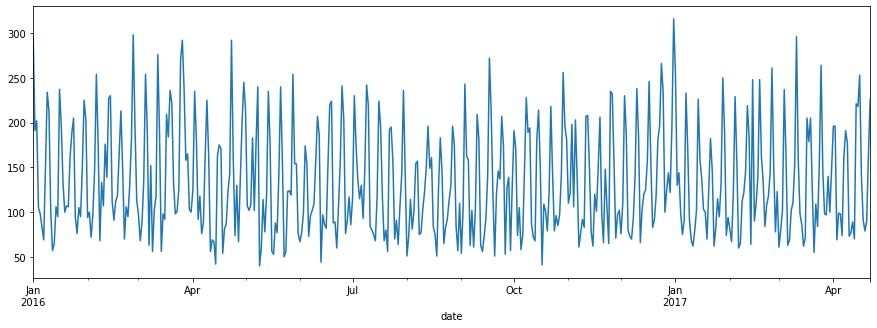

In [78]:
data['total'].plot(figsize=(15,5))

In [79]:
data.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

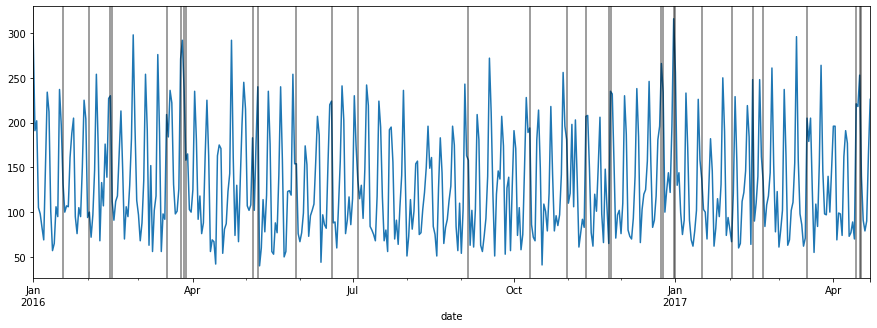

In [81]:
ax = data['total'].plot(figsize=(15,5))

for x in data.query('holiday==1').index:
  ax.axvline(x=x,color='black',alpha=0.5); #Adding vertical lines when holidays = 1

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

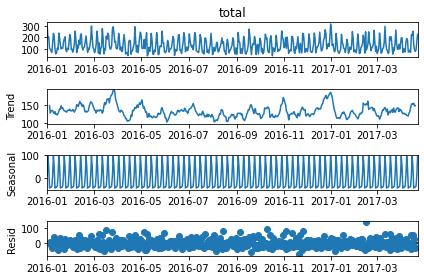

In [83]:
result = seasonal_decompose(data['total'])
result.plot();

Seasonal component exists

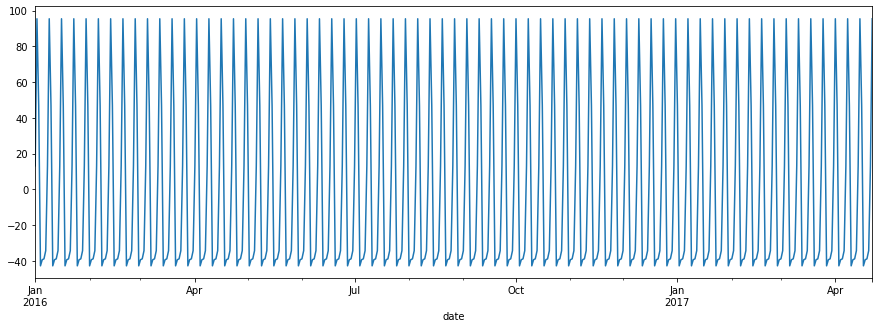

In [84]:
result.seasonal.plot(figsize=(15,5))

In [85]:
len(data)

478

In [0]:
train=data.iloc[:436]
test=data.iloc[436:]

In [0]:
from pmdarima import auto_arima

In [91]:
auto_arima(data['total'],seasonal=True,m=7).summary() #mis 7 because season is repeated after 7 days

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2387.926
Date:                   Sun, 24 May 2020   AIC                           4783.852
Time:                           17:45:30   BIC                           4800.531
Sample:                                0   HQIC                          4790.409
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.0699      2.102      2.887      0.004       1.949      10.191
ar.S.L7        0.9534      0.016     60.039      0.000       0.922       0.985
ma.S.L7       -0.7315      0.056    -13.101      0.000      -0.841      -0.622
sigma2      1357.6408     88.981     15.258      0.000    1183.242    1532.040
===================================================================================
Ljung-Box (Q):                       73.59   Jarque-Bera (JB):                58.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.73
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [93]:
model=SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sun, 24 May 2020   AIC                           4457.403
Time:                                   18:01:08   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
start = len(train)
end = len(train) + len(test) -1

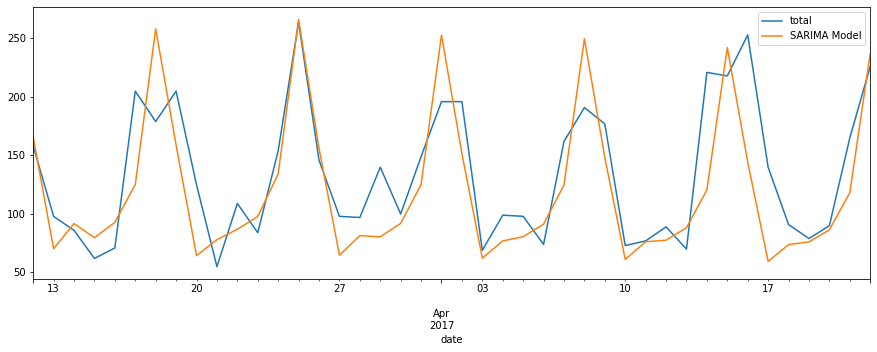

In [99]:
predictions = results.predict(start,end).rename('SARIMA Model')
test['total'].plot(legend=True,figsize=(15,5));
predictions.plot(legend=True);
for x in test.query('holiday==1').index:
  ax.axvline(x=x,color='black',alpha=0.8); #Adding vertical lines when holidays = 1

In [0]:
from statsmodels.tools.eval_measures import rmse

In [101]:
rmse(test['total'],predictions)

41.26315491179164

**Case 2: With Exogenous variables**

In [135]:
auto_arima(data['total'],exogenous=data[['holiday']], seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2352.074
Date:                             Sun, 24 May 2020   AIC                           4716.148
Time:                                     18:46:32   BIC                           4741.166
Sample:                                 01-01-2016   HQIC                          4725.984
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.0543      2.850      5.634      0.000      10.469      21.639
holiday       45.9411      4.303     10.676      0.000      37.507      54.375
ar.L1          0.0462      0.046      1.004      0.316      -0.044       0.136
ar.S.L7        0.8725      0.022     40.019      0.000       0.830       0.915
ma.S.L7       -0.4876      0.059     -8.335      0.000      -0.602      -0.373
sigma2      1037.9156     70.910     14.637      0.000     898.934    1176.897
===================================================================================
Ljung-Box (Q):                      115.75   Jarque-Bera (JB):                 8.07
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.89   Skew:                             0.31
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
model = SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [0]:
result = model.fit()

In [122]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.208
Date:                             Sun, 24 May 2020   AIC                           4188.417
Time:                                     18:36:32   BIC                           4208.805
Sample:                                 01-01-2016   HQIC                          4196.463
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.9347      3.773     18.271      0.000      61.540      76.329
ar.L1          0.2101      0.044      4.763      0.000       0.124       0.297
ar.S.L7        1.0000   5.78e-05   1.73e+04      0.000       1.000       1.000
ma.S.L7       -0.9581      0.022    -43.532      0.000      -1.001      -0.915
sigma2       779.3165     44.867     17.370      0.000     691.379     867.254
===================================================================================
Ljung-Box (Q):                       36.17   Jarque-Bera (JB):                20.47
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
start = len(train)
end = len(train) + len(test) - 1

In [0]:
predictions = result.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with Exog')

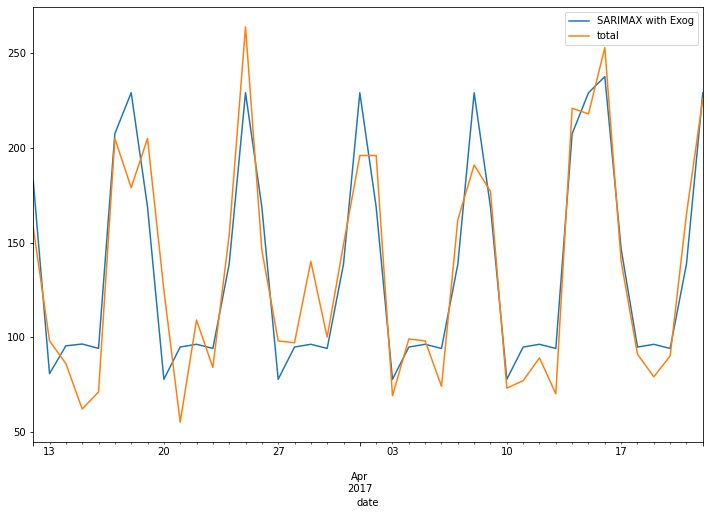

In [125]:
predictions.plot(figsize=(12,8),legend=True)
test['total'].plot(legend=True)

In [126]:
from statsmodels.tools.eval_measures import mse, rmse
rmse(test['total'],predictions)

22.929760570128547

**Forecasting into the future**

In [0]:
model = SARIMAX(data['total'],exog=data[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [0]:
result = model.fit()

In [137]:
data_or=pd.read_csv('/content/drive/My Drive/Colab Notebooks/RestaurantVisitors.csv', index_col='date',parse_dates=True)
data_or.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [0]:
exog_forecast = data_or[478:][['holiday']]

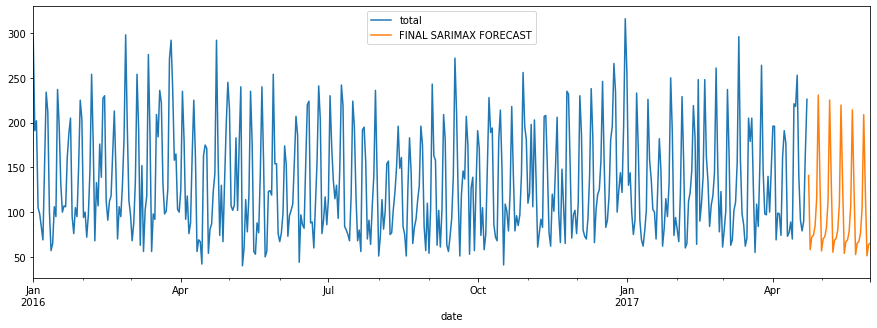

In [139]:
forecast= results.predict(len(data),len(data)+38,exog=exog_forecast).rename('FINAL SARIMAX FORECAST')
data['total'].plot(legend=True,figsize=(15,5));
forecast.plot(legend=True);